In [10]:
# -*- coding: utf-8 -*-
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import ht
import CoolProp as cp


### Problema
Se quiere diseñar una caldera para un montaje experimental de condensación a bajas presiones. La
caldera debe suministrar 0,5.10$^{-3}$ kg/s de vapor saturado a 5000 Pa. ¿De que tamaño debe ser el área
del calentador si el flujo de calor por unidad de área no debe ser superior al 30% del flujo crítico por
quemado destructivo? ¿Cuál será la temperatura superficial del calentador con este flujo de calor
por unidad de área si está niquelado? Tomar $C_{nb}$ =0,006, suponer superficie grande y plana.

In [11]:
Cnb = 0.006 #valor para correlacion DT vs q Rosenhow, depende de fluido + material
Cmax = 0.15 #calefactor plano

g = 9.8
m_v = 0.5e-3


rho_v = cp.CoolProp.PropsSI('D','P',5000, 'Q',1,'Water')
rho_l = cp.CoolProp.PropsSI('D','P',5000, 'Q',0,'Water')
Cp_v = cp.CoolProp.PropsSI('C','P',5000, 'Q',1,'Water')
Cp_l = cp.CoolProp.PropsSI('C','P',5000, 'Q',0,'Water')

i_v = cp.CoolProp.PropsSI('H','P',5000, 'Q',1,'Water')
i_l = cp.CoolProp.PropsSI('H','P',5000, 'Q',0,'Water')
sigma_l = cp.CoolProp.PropsSI('I','P',5000, 'Q',0,'Water')
mu_l = cp.CoolProp.PropsSI('V','P',5000, 'Q',0,'Water')
k_l = cp.CoolProp.PropsSI('L','P',5000, 'Q',0,'Water')
hf_g = i_v-i_l

Q_evap = hf_g * m_v



\begin{equation}
    q_\max =C_{\max} V_{\max} \rho_v h_{fg}
\end{equation}	

\begin{equation}\label{vmax}
	V_{max}=\left(\frac{\sigma g(\rho_l-\rho_v)}{\rho_v^2}\right)^{1/4}~~~~ \text{dimensiones}~~~~ \left(\frac{(N/m) (N/kg)(m^3/kg)}{{\left(m^3/kg\right)}^2}\right)^{1/4}
\end{equation}	

In [12]:
V_max = (sigma_l * g*(rho_l-rho_v)/rho_v**2)**(1/4)


q_max = Cmax*V_max*rho_v*hf_g
q_max30 = 0.3*q_max

print('Vmax=%.2f \t\t qmax= %.2g    '%(V_max,q_max))




Vmax=27.21 		 qmax= 3.5e+05    


$$Q_{evap} = 0.3 q_\max*A$$

In [13]:
Area  = Q_evap/q_max30
print('Area = %.2g m2'%Area)

Area = 0.012 m2


### Ebullición nucleada 
De acuerdo a Rohsenow, Warren M. "A Method of Correlating Heat Transfer Data for
Surface Boiling of Liquids." Technical Report. Cambridge, Mass. : M.I.T. Division of Industrial Cooporation, 1951
   
Las entradas son flujo de calor o exceso de temperatura.
    
A partir de $\Delta T$
\begin{equation}    
h = {{\mu }_{L}} \Delta H_{vap} \left[ \frac{g( \rho_L-\rho_v)}
{\sigma } \right]^{0.5}\left[\frac{C_{p,L}\Delta T_e^{2/3}}{C_{sf}
\Delta H_{vap} Pr_L^n}\right]^3
\end{equation}
    
A partir de $q$:
    
\begin{equation}
h = \left({{\mu }_{L}} \Delta H_{vap} \left[ \frac{g( \rho_L-\rho_v)}
{\sigma } \right]^{0.5}\left[\frac{C_{p,L}\Delta T_e^{2/3}}{C_{sf}
\Delta H_{vap} Pr_L^n}\right]^3\right)^{1/3}q^{2/3}
\end{equation}
    
    Parametros
    ----------
    rhol : Densidad del líquido [kg/m^3]
    rhog : Densidad del vapor [kg/m^3]
    mul : Viscosidad del líquido [Pa*s]
    kl : Conductividad térmica del líquido [W/m/K]
    Cpl : Calor específico del líquido [J/kg/K]
    Hvap : Calor latente de vaporización a una presión P [J/kg]
    sigma : Tensión superficial del líquido  [N/m]
    Te : Exceso de temperatura de pared [K]
    q : Flujo de calor [W/m^2]
    Csf : Coeficiente de Rosenhow, dependiente del fluido y del metal calefactor [-]
    n : Constante, 1 for agua, 1.7 (defecto) para otros fluidos [-]

    Salida
    -------
    h : Coeficiente del transferencia de calor [W/m^2/K]

In [15]:
Temps = np.linspace(5,15,100) #vector de Delta T de 5 a 15, 100 elementos


h_nucl = []  #lista para guardar el coeficiente de conveccion
q_i = []     #lista para guardar el flujo de calor

for i,Tempsi in enumerate(Temps):
    
    h_nucl.append(ht.Rohsenow(rhol=957.854, rhog=rho_v, mul=mu_l, kl=k_l, Cpl=Cp_l, Hvap=hf_g ,
         sigma=sigma_l, Te=Tempsi, Csf=Cnb, n=1.))
    q_i.append(h_nucl[i]*Tempsi)

q_i = np.asarray(q_i)
h_nucl = np.asarray(q_i)
#conseguimos vector de Delta T, de h y de q

indice_solucion = np.abs(q_i-q_max30).argmin() 

q_solucion = q_i[indice_solucion]
Temp_solucion = Temps[indice_solucion]

<IPython.core.display.Javascript object>


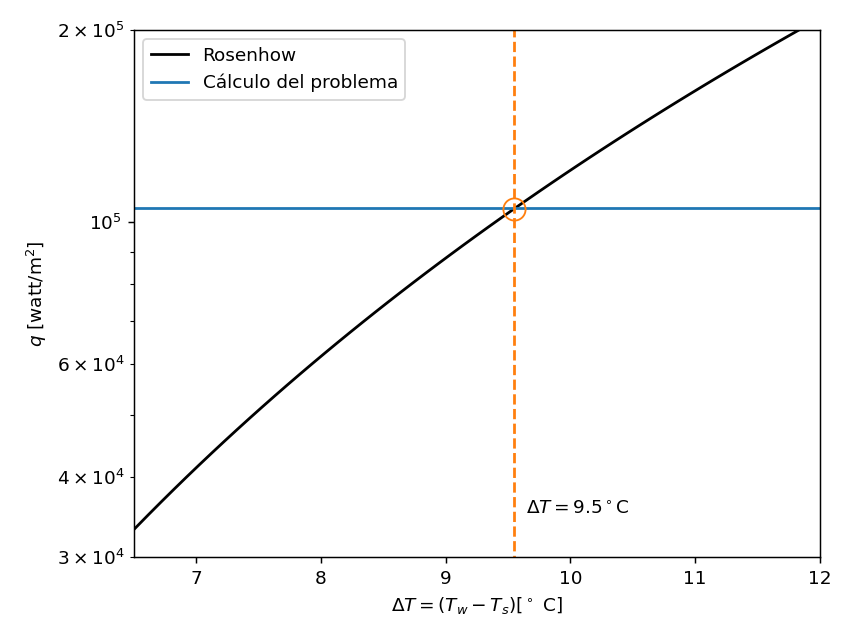

In [16]:
fig0,ax0 = plt.subplots()
ax0.semilogy(Temps,q_i,'k',label='Rosenhow')
ax0.plot(Temps,q_max30*np.ones_like(Temps),label=r'Cálculo del problema')
ax0.set_xlim([6.5,12])
ax0.set_ylim([3e4,20e4])
ax0.set_xlabel(r'$\Delta T=(T_w-T_s) [^\circ$ C]')
ax0.set_ylabel(r'$q$ [watt/m$^2]$')
ax0.legend()
fig0.tight_layout()
fig0.savefig('solucion_evap_0.png')
ln, = ax0.plot(Temps[indice_solucion],q_solucion,'o',markersize=12,markerfacecolor='none',label='solucion')
ax0.plot([Temps[indice_solucion],Temps[indice_solucion]],[1e4,2e5],'--',color=ln.get_color())
ax0.text(Temps[indice_solucion]+.1,3.5e4,r'$\Delta T = %.1f^\circ $C '%Temp_solucion)
fig0.savefig('solucion_evap_1.png')


<IPython.core.display.Javascript object>


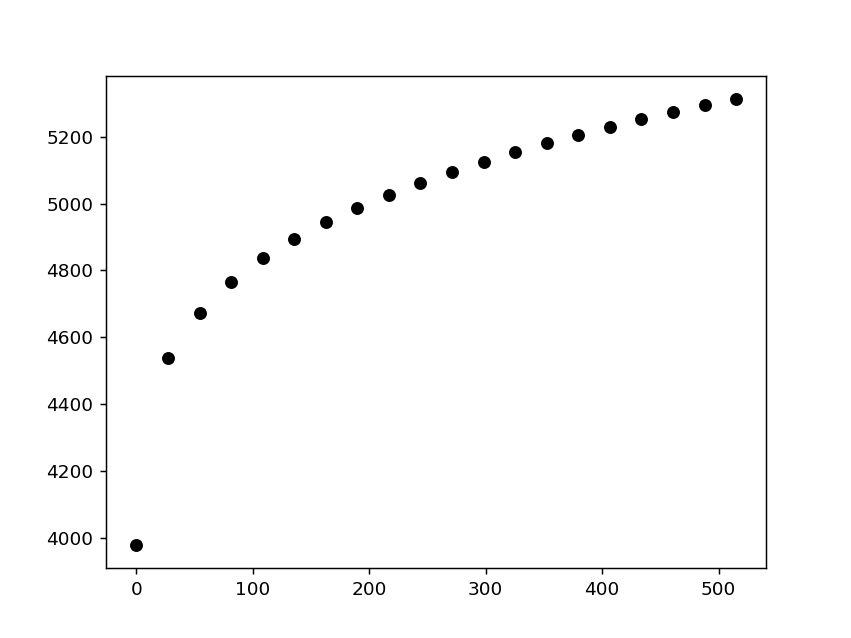

In [9]:
fig1,ax1 = plt.subplots()
for Tei in np.linspace(.1,515,20):
    h_eb = ht.Chen_Edelstein(m=0.106, x=0.9, D=0.0212, rhol=567, 
               rhog=18.09, mul=156E-6, mug=7.11E-6, kl=0.086, Cpl=2730, Hvap=2E5, sigma=0.02, dPsat=1E5, Te=Tei)
    ax1.plot(Tei,h_eb,'ko')

Para conocer las entradas  http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table

<IPython.core.display.Javascript object>


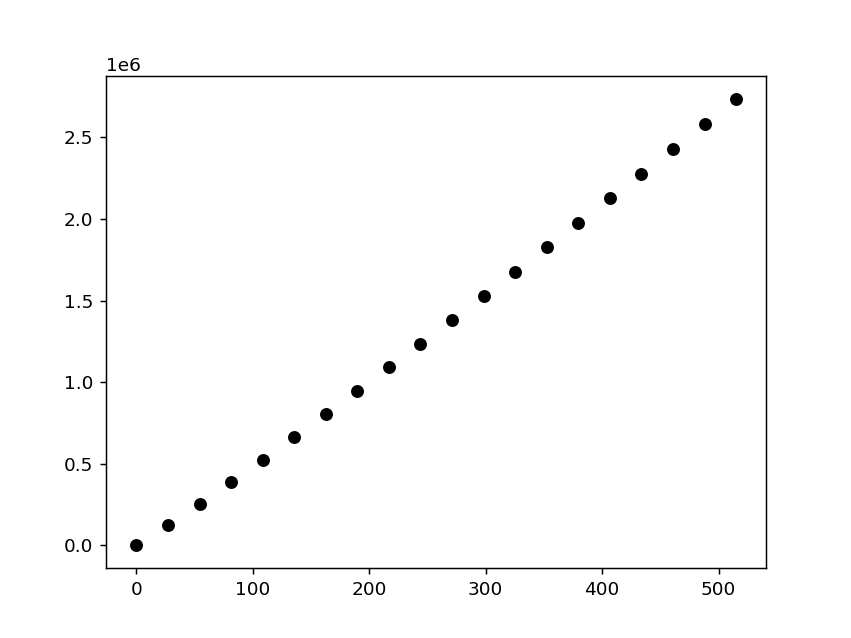

In [18]:
fig1,ax1 = plt.subplots()
for Tei in np.linspace(.1,515,20):
    h_eb = ht.Chen_Edelstein(m=0.106, x=0.9, D=0.0212, rhol=567, 
               rhog=18.09, mul=156E-6, mug=7.11E-6, kl=0.086, Cpl=2730, Hvap=2E5, sigma=0.02, dPsat=1E5, Te=Tei)
    ax1.plot(Tei,Tei*h_eb,'ko')

In [5]:
.20*(81256+310762)-10000

68403.6